# Real Estate ML - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

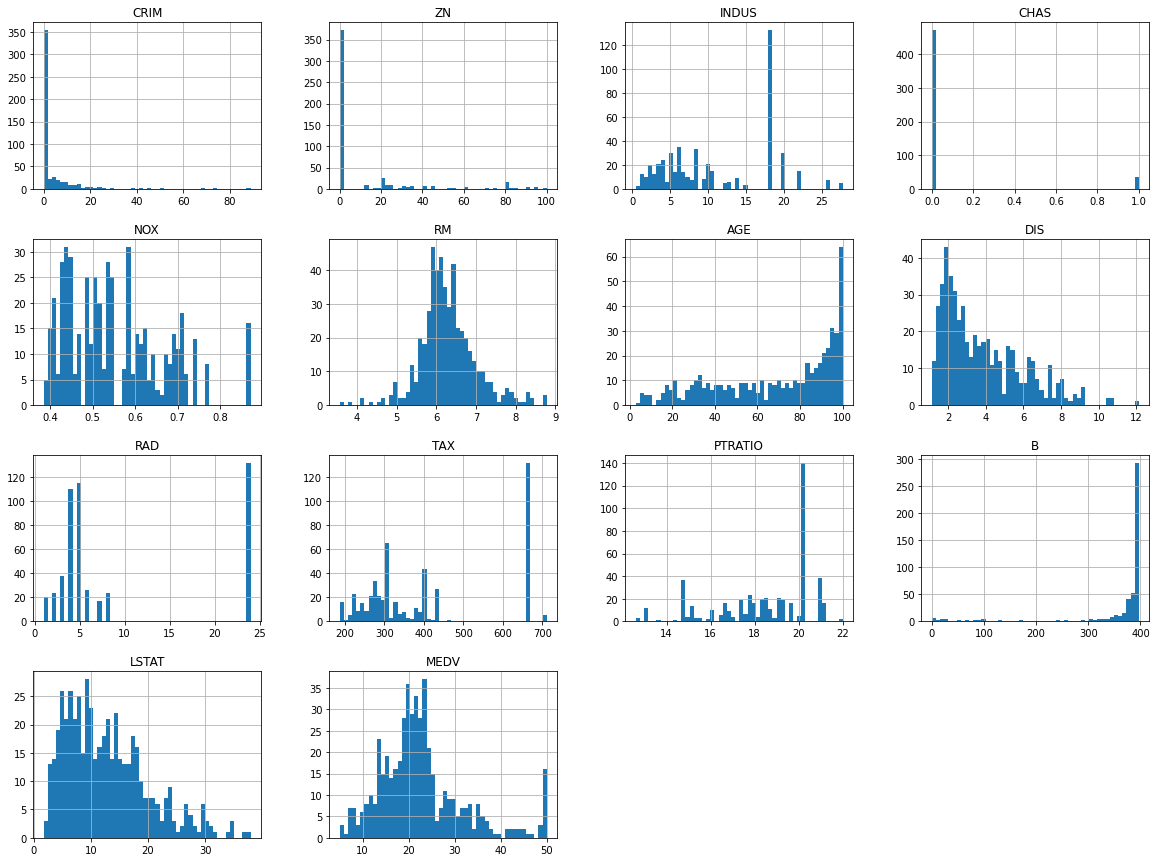

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Data Splitting

In [10]:
import numpy as np

# def split_data(data, test_ratio):
#     np.random.seed(7)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
    
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=7)
print(f"Rows in Training Data: {len(train_set)}\nRows in Testing Data: {len(test_set)}")

Rows in Training Data: 404
Rows in Testing Data: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=7)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Correlations

In [13]:
housing = strat_train_set.copy()
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.668967
B          0.311930
ZN         0.292800
DIS        0.200339
CHAS       0.132203
AGE       -0.328783
RAD       -0.353844
NOX       -0.397238
CRIM      -0.404437
TAX       -0.456295
INDUS     -0.459150
PTRATIO   -0.477584
LSTAT     -0.736119
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

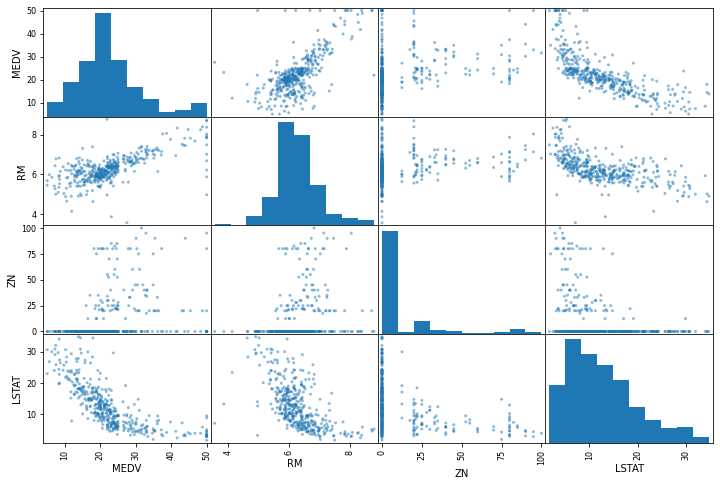

In [14]:
from pandas.plotting import scatter_matrix 
attributes = ["MEDV","RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

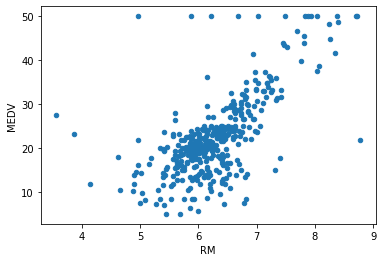

In [15]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=1)

## Attribute Combos

In [16]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.668967
B          0.311930
ZN         0.292800
DIS        0.200339
CHAS       0.132203
AGE       -0.328783
RAD       -0.353844
NOX       -0.397238
CRIM      -0.404437
TAX       -0.456295
INDUS     -0.459150
PTRATIO   -0.477584
TAXRM     -0.517722
LSTAT     -0.736119
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

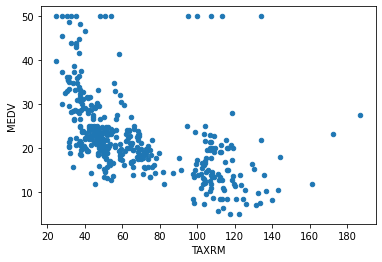

In [18]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=1)

In [19]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [20]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# imputer.fit(housing)
# X = imputer.transform(housing)
# housing_tr = pd.DataFrame(X, columns=housing.columns)

# Pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std-scaler', StandardScaler())
])


In [22]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [23]:
housing_num_tr.shape

(404, 13)

## Desired Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [25]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
432,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666,20.2,97.95,12.03
29,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [26]:
some_labels = housing_labels.iloc[:5]

In [27]:
prepared_data = my_pipeline.transform(some_data)

In [28]:
model.predict(prepared_data)

array([18.579, 20.987, 15.638, 15.652, 23.541])

In [29]:
list(some_labels)

[16.1, 21.0, 15.6, 17.1, 23.0]

## Evaluation

In [30]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [31]:
lin_mse


1.4356930915841581

## Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [33]:
rmse_scores

array([2.91913263, 2.83747461, 2.59202521, 3.27614058, 4.89552774,
       2.39272192, 3.31576628, 7.40360542, 2.56118765, 2.29206682])

In [34]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [35]:
print_scores(rmse_scores)

Scores: [2.91913263 2.83747461 2.59202521 3.27614058 4.89552774 2.39272192
 3.31576628 7.40360542 2.56118765 2.29206682]
Mean:  3.448564886808336
Standard Deviation:  1.497014805638834


## Saving Model

In [36]:
from joblib import dump, load
dump(model, 'ML.joblib')

['ML.joblib']

## Testing Model

In [37]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[ 9.52  30.925 20.652 17.391 20.66  16.837 32.687 20.962 20.339 20.57
 11.168 26.217 22.242 12.333 35.688 34.423 14.465 34.04  45.038 19.742
 26.407 19.789 31.869  8.806 20.158 24.401 27.481 20.227 47.68  30.838
 18.855 29.735 42.259  8.863 19.062 35.271 47.635 14.881 15.914 29.72
 19.47  18.661 19.673 23.539  8.866 22.723 26.045 16.223 45.558 10.616
 23.366 16.44  15.399 21.113 20.85  14.778 23.996 22.314 15.316 23.133
 23.478 24.187 20.87  19.893 19.698 16.89  21.332 21.252 15.657 13.972
 22.79  18.437 21.623 31.868 14.41  25.791 41.666 20.476 22.116 20.852
 15.126 15.686 21.792 35.067 20.624 23.222 19.011 14.664 31.907 19.853
 20.001 23.295 20.094 10.241 21.478 13.675 16.285 43.861 43.932 12.38
 21.005 20.909] [13.1, 37.0, 19.2, 27.5, 20.8, 17.3, 34.6, 24.4, 19.3, 22.6, 13.8, 24.4, 21.2, 12.0, 37.9, 36.2, 10.2, 33.3, 50.0, 21.5, 23.3, 19.3, 32.0, 8.8, 19.8, 25.3, 24.0, 20.6, 50.0, 32.2, 19.6, 31.5, 35.2, 7.0, 18.8, 33.4, 48.5, 14.5, 15.2, 31.2, 20.4, 17.6, 20.6, 26.4, 8.8, 21.4, 26.

In [38]:
final_rmse

2.8670538355737993

In [39]:
prepared_data

array([[ 0.44669285, -0.47208881,  0.99170413, -0.27288841,  0.25503379,
         0.21556492,  0.17802152, -0.734384  ,  1.67495161,  1.53116228,
         0.80120112, -2.91278062, -0.09755874],
       [-0.33008283, -0.47208881, -0.44174814, -0.27288841, -0.14956127,
         0.57427876,  0.63420902,  0.2297794 , -0.63532647, -0.5986116 ,
         1.1746482 ,  0.25227258, -0.10453907],
       [-0.16555187, -0.47208881,  1.20470708, -0.27288841,  2.77935517,
        -0.93260749,  1.09769551, -1.05778974, -0.51981257, -0.0290899 ,
        -1.76624753, -2.11310797,  0.54742366],
       [ 0.91492373, -0.47208881,  0.99170413, -0.27288841,  1.62713879,
         0.18819318,  0.99550951, -0.79837464,  1.67495161,  1.53116228,
         0.80120112,  0.31651997,  0.94809455],
       [-0.42986059, -0.47208881, -0.55112803, -0.27288841, -0.54536079,
         0.05277511, -1.49709895,  0.78639861, -0.51981257, -0.71726196,
         0.52111581,  0.43918429, -0.91844543]])